In [18]:
# Procesamiento de datos
import pandas as pd
# Funciones algebráicas
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
## Estilos
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
# Contador
from collections import Counter
# Métodos de iteración
from itertools import product
# Machine Learning
## Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
## Separación de datos de entrenamiento
from sklearn.model_selection import train_test_split
## Preprocesamiento de variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, RobustScaler, MaxAbsScaler, QuantileTransformer
## Modelo de máquina de soporte vectorial
from sklearn.svm import SVC
## Clasificador de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
## Clasificador de bosques aleatorios
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
## Regresión Logística
from sklearn.linear_model import LogisticRegression
## Muestreado para balancear datos
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
## Métricas
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay, f1_score, make_scorer, precision_score, recall_score
## Ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# módulo que proporciona soporte en tiempo de ejecución para sugerencias de tipo
from sklearn import datasets
from typing import Dict, Iterable, Any
# Desactivar los avisos
import warnings
warnings.filterwarnings('ignore')
# Importar los datos de yahoo
import yfinance as yf
# Librería para plotear mejor datos financieros
#import cufflinks as cf
#cf.set_config_file(offline = True)

He intentado escoger acciones con poca correlación. La explicación de ellas es:

AAPL: Apple Inc., uno de los fabricantes más grandes de tecnología de consumo, conocido por productos como el iPhone, el iPad y las MacBooks.

RELIANCE.NS: Reliance Industries Limited, una conglomerado multinacional indio que tiene negocios en diversos sectores como energía, petroquímicos, textiles, recursos naturales, y telecomunicaciones. El sufijo ".NS" indica que la acción se negocia en la National Stock Exchange of India.

BHP.AX: BHP Group Limited (anteriormente BHP Billiton), una de las compañías mineras y de recursos más grandes del mundo. El sufijo ".AX" indica que la acción se negocia en la Australian Securities Exchange.

SAN.MC: Banco Santander, S.A., un banco multinacional español y una de las mayores instituciones bancarias de la zona euro. El sufijo ".MC" indica que la acción se negocia en la Bolsa de Madrid.

REP.MC: Repsol, S.A., una empresa energética y petroquímica española. Al igual que SAN.MC, el sufijo ".MC" indica que la acción se negocia en la Bolsa de Madrid.

IBE.MC: Iberdrola, S.A., una empresa española de energía, una de las mayores productoras de energía renovable. También cotiza en la Bolsa de Madrid.

TEF.MC: Telefónica, S.A., una compañía multinacional de telecomunicaciones con sede en España. También cotiza en la Bolsa de Madrid.

Acciones con las que trabajaré: 

["AAPL", "RELIANCE.NS", "BHP.AX", "SAN.MC", "REP.MC", "IBE.MC", "TEF.MC"]

In [2]:
df = pd.read_csv("acciones_preprocesado.csv")

# esto es una prueba, voy a quitar los 0 de la variable direccion pq si no, los modelos no lo interpretan bien..
#df = df.loc[df['direction'] != 0].copy()

df.reset_index(inplace=True, drop=True)
df


,accion,date,high,low,price,returns,direction,lag1,lag2,lag3,lag4,lag5,sma200,sma_lower200,sma_upper200,ema_s,ema_l,roll_low,roll_high
0,AAPL,2000-10-24,0.372768,0.335938,0.285350,-0.076468,-1.0,0.043894,0.029268,-0.060818,0.000000,-0.066091,0.786866,0.439835,1.133898,0.331946,0.444854,0.327009,0.437500
1,AAPL,2000-10-25,0.342634,0.329241,0.279680,-0.020069,-1.0,-0.076468,0.043894,0.029268,-0.060818,0.000000,0.784759,0.430590,1.138928,0.323905,0.432619,0.327009,0.415179
2,AAPL,2000-10-26,0.337054,0.312500,0.279680,0.000000,0.0,-0.020069,-0.076468,0.043894,0.029268,-0.060818,0.782862,0.421987,1.143738,0.317101,0.421290,0.312500,0.415179
3,AAPL,2000-10-27,0.342634,0.319196,0.280625,0.003372,1.0,0.000000,-0.020069,-0.076468,0.043894,0.029268,0.780609,0.412876,1.148342,0.311489,0.410870,0.312500,0.415179
4,AAPL,2000-10-30,0.356027,0.334821,0.291963,0.039610,1.0,0.003372,0.000000,-0.020069,-0.076468,0.043894,0.778273,0.404112,1.152433,0.308485,0.402062,0.312500,0.415179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41652,TEF.MC,2024-02-23,3.776000,3.710000,3.776000,0.008778,1.0,0.015888,0.004625,0.011244,0.018089,-0.015880,3.636597,3.396894,3.876300,3.671950,3.676017,3.541000,3.792000
41653,TEF.MC,2024-02-26,3.794000,3.748000,3.776000,0.000000,0.0,0.008778,0.015888,0.004625,0.011244,0.018089,3.637271,3.396759,3.877783,3.687958,3.683423,3.541000,3.794000
41654,TEF.MC,2024-02-27,3.815000,3.751000,3.810000,0.008964,1.0,0.000000,0.008778,0.015888,0.004625,0.011244,3.638124,3.396375,3.879873,3.706734,3.692799,3.541000,3.815000
41655,TEF.MC,2024-02-28,3.874000,3.814000,3.828000,0.004713,1.0,0.008964,0.000000,0.008778,0.015888,0.004625,3.639109,3.395876,3.882342,3.725390,3.702814,3.541000,3.874000


Lo primero que voy a hacer es transformar la fecha para poder meterla como variable numérica 

In [3]:
df.loc[df['high'] > 1000]

,accion,date,high,low,price,returns,direction,lag1,lag2,lag3,lag4,lag5,sma200,sma_lower200,sma_upper200,ema_s,ema_l,roll_low,roll_high
10309,RELIANCE.NS,2018-07-12,1004.851624,953.283264,969.731873,0.041068,1.0,0.012691,0.028280,0.019802,0.013440,-0.026196,828.110678,747.110137,909.111219,903.130052,887.006810,859.747070,1004.851624
10310,RELIANCE.NS,2018-07-13,1013.994995,987.479309,985.366211,0.015994,1.0,0.041068,0.012691,0.028280,0.019802,0.013440,829.381608,746.539523,912.223693,915.781768,894.292692,859.747070,1013.994995
10311,RELIANCE.NS,2018-07-16,1013.903564,981.124695,964.221802,-0.021692,-1.0,0.015994,0.041068,0.012691,0.028280,0.019802,830.553268,746.745216,914.361321,923.234081,899.472626,859.747070,1013.994995
10312,RELIANCE.NS,2018-07-17,1002.062927,977.970276,978.691345,0.014895,1.0,-0.021692,0.015994,0.041068,0.012691,0.028280,831.890504,747.205319,916.575689,931.765968,905.340679,859.747070,1013.994995
10313,RELIANCE.NS,2018-07-18,1009.971924,985.010620,978.870544,0.000183,1.0,0.014895,-0.021692,0.015994,0.041068,0.012691,833.285151,748.149770,918.420531,939.012826,910.787336,867.701721,1013.994995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,RELIANCE.NS,2024-02-23,2995.100098,2966.699951,2987.250000,0.007982,1.0,0.009527,-0.002263,-0.002020,0.009150,-0.006840,2473.037549,2092.043522,2854.031576,2931.808126,2864.137012,2839.649902,2995.100098
11696,RELIANCE.NS,2024-02-26,2989.050049,2965.000000,2974.649902,-0.004227,-1.0,0.007982,0.009527,-0.002263,-0.002020,0.009150,2476.543140,2090.065999,2863.020280,2938.399169,2872.323152,2855.050049,2995.100098
11697,RELIANCE.NS,2024-02-27,2999.899902,2956.100098,2971.300049,-0.001127,-1.0,-0.004227,0.007982,0.009527,-0.002263,-0.002020,2479.996801,2088.250795,2871.742806,2943.460843,2879.654774,2855.050049,2999.899902
11698,RELIANCE.NS,2024-02-28,2982.550049,2900.350098,2911.250000,-0.020417,-1.0,-0.001127,-0.004227,0.007982,0.009527,-0.002263,2483.071802,2087.487999,2878.655605,2938.505328,2881.995161,2884.699951,2999.899902


In [4]:
df.date = pd.to_datetime(df.date)

# Extraer componentes de la fecha
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # 0 es lunes, 6 es domingo
df['day_of_year'] = df['date'].dt.dayofyear
df['week_of_year'] = df['date'].dt.isocalendar().week

# Aplicar codificación cíclica para mes y día de la semana
df['sin_month'] = np.sin(2 * np.pi * df['month']/12)
df['cos_month'] = np.cos(2 * np.pi * df['month']/12)
df['sin_day'] = np.sin(2 * np.pi * df['day']/31)
df['cos_day'] = np.cos(2 * np.pi * df['day']/31)
df['sin_day_of_week'] = np.sin(2 * np.pi * df['day_of_week']/7)
df['cos_day_of_week'] = np.cos(2 * np.pi * df['day_of_week']/7)

# elimino la columna date porque ya la he procesado y la fecha como tal no se puede meter en el modelo
# elimino las otras variables que he transformado con seno y coseno para el tema de los ciclos naturales 
df.drop(["date", "month", "day", "day_of_week"], axis = 1, inplace = True)

df

,accion,high,low,price,returns,direction,lag1,lag2,lag3,lag4,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,AAPL,0.372768,0.335938,0.285350,-0.076468,-1.0,0.043894,0.029268,-0.060818,0.000000,...,0.437500,2000,298,43,-0.866025,0.5,-0.988468,0.151428,0.781831,0.623490
1,AAPL,0.342634,0.329241,0.279680,-0.020069,-1.0,-0.076468,0.043894,0.029268,-0.060818,...,0.415179,2000,299,43,-0.866025,0.5,-0.937752,0.347305,0.974928,-0.222521
2,AAPL,0.337054,0.312500,0.279680,0.000000,0.0,-0.020069,-0.076468,0.043894,0.029268,...,0.415179,2000,300,43,-0.866025,0.5,-0.848644,0.528964,0.433884,-0.900969
3,AAPL,0.342634,0.319196,0.280625,0.003372,1.0,0.000000,-0.020069,-0.076468,0.043894,...,0.415179,2000,301,43,-0.866025,0.5,-0.724793,0.688967,-0.433884,-0.900969
4,AAPL,0.356027,0.334821,0.291963,0.039610,1.0,0.003372,0.000000,-0.020069,-0.076468,...,0.415179,2000,304,44,-0.866025,0.5,-0.201299,0.979530,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41652,TEF.MC,3.776000,3.710000,3.776000,0.008778,1.0,0.015888,0.004625,0.011244,0.018089,...,3.792000,2024,54,8,0.866025,0.5,-0.998717,-0.050649,-0.433884,-0.900969
41653,TEF.MC,3.794000,3.748000,3.776000,0.000000,0.0,0.008778,0.015888,0.004625,0.011244,...,3.794000,2024,57,9,0.866025,0.5,-0.848644,0.528964,0.000000,1.000000
41654,TEF.MC,3.815000,3.751000,3.810000,0.008964,1.0,0.000000,0.008778,0.015888,0.004625,...,3.815000,2024,58,9,0.866025,0.5,-0.724793,0.688967,0.781831,0.623490
41655,TEF.MC,3.874000,3.814000,3.828000,0.004713,1.0,0.008964,0.000000,0.008778,0.015888,...,3.874000,2024,59,9,0.866025,0.5,-0.571268,0.820763,0.974928,-0.222521


Ahora voy a separar los data frames en:
1.- variables categóricas para hacerle onehotencoding
2.- variables numéricas para aplicarle escaladores
3.- variables seno y cosenoidales que no se transforman ya más
4.- variable objetivo (dirección)

In [5]:
df_cat = df[["accion"]].copy()
columns_to_copy = [col for col in df.columns if col.startswith('sin') or col.startswith('cos')]
df_sincos = df[columns_to_copy].copy()
columns_to_exclude = columns_to_copy + ["accion", "direction"]
columns_to_select = [col for col in df.columns if col not in columns_to_exclude]
df_num = df[columns_to_select].copy()
df_dir = df[["direction"]].copy()

Empiezo haciendo one hot encoding sobre la única variable tipo texto que tengo. El nombre de la acción

In [6]:
df_cat = pd.get_dummies(df_cat, columns=["accion"], drop_first = True).astype(int)
df_cat 

,accion_AAPL,accion_BHP.AX,accion_IBE.MC,accion_RELIANCE.NS,accion_REP.MC,accion_SAN.MC,accion_TEF.MC
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
41652,0,0,0,0,0,0,1
41653,0,0,0,0,0,0,1
41654,0,0,0,0,0,0,1
41655,0,0,0,0,0,0,1


Ahora aplico escaladores sobre las variables numéricas

In [7]:
df_num.where(df_num.high > 1000)

,high,low,price,returns,lag1,lag2,lag3,lag4,lag5,sma200,sma_lower200,sma_upper200,ema_s,ema_l,roll_low,roll_high,year,day_of_year,week_of_year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
41653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
41654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
41655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


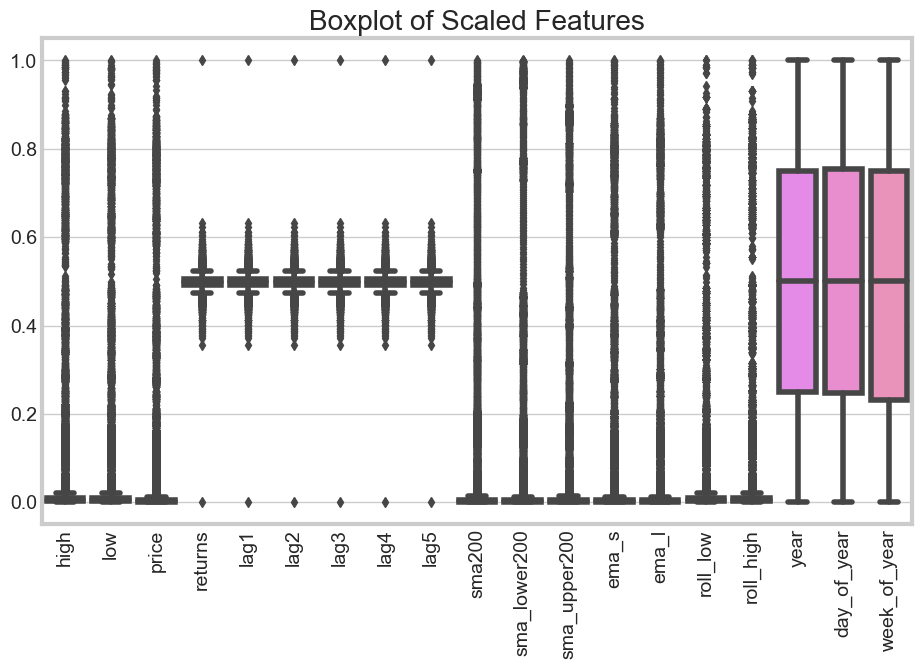

In [8]:

scaled_data = scaler.fit_transform(df_num)

# Convertir de nuevo a DataFrame si es necesario, manteniendo los mismos nombres de columnas
df_num = pd.DataFrame(scaled_data, columns=df_num.columns)
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico a tu preferencia

# Boxplot de todos los datos escalados
sns.boxplot(data=df_num)

# Dar título al gráfico
plt.title('Boxplot of Scaled Features')

# Mejorar los ticks del eje x para evitar la superposición
plt.xticks(rotation=90)

plt.show()


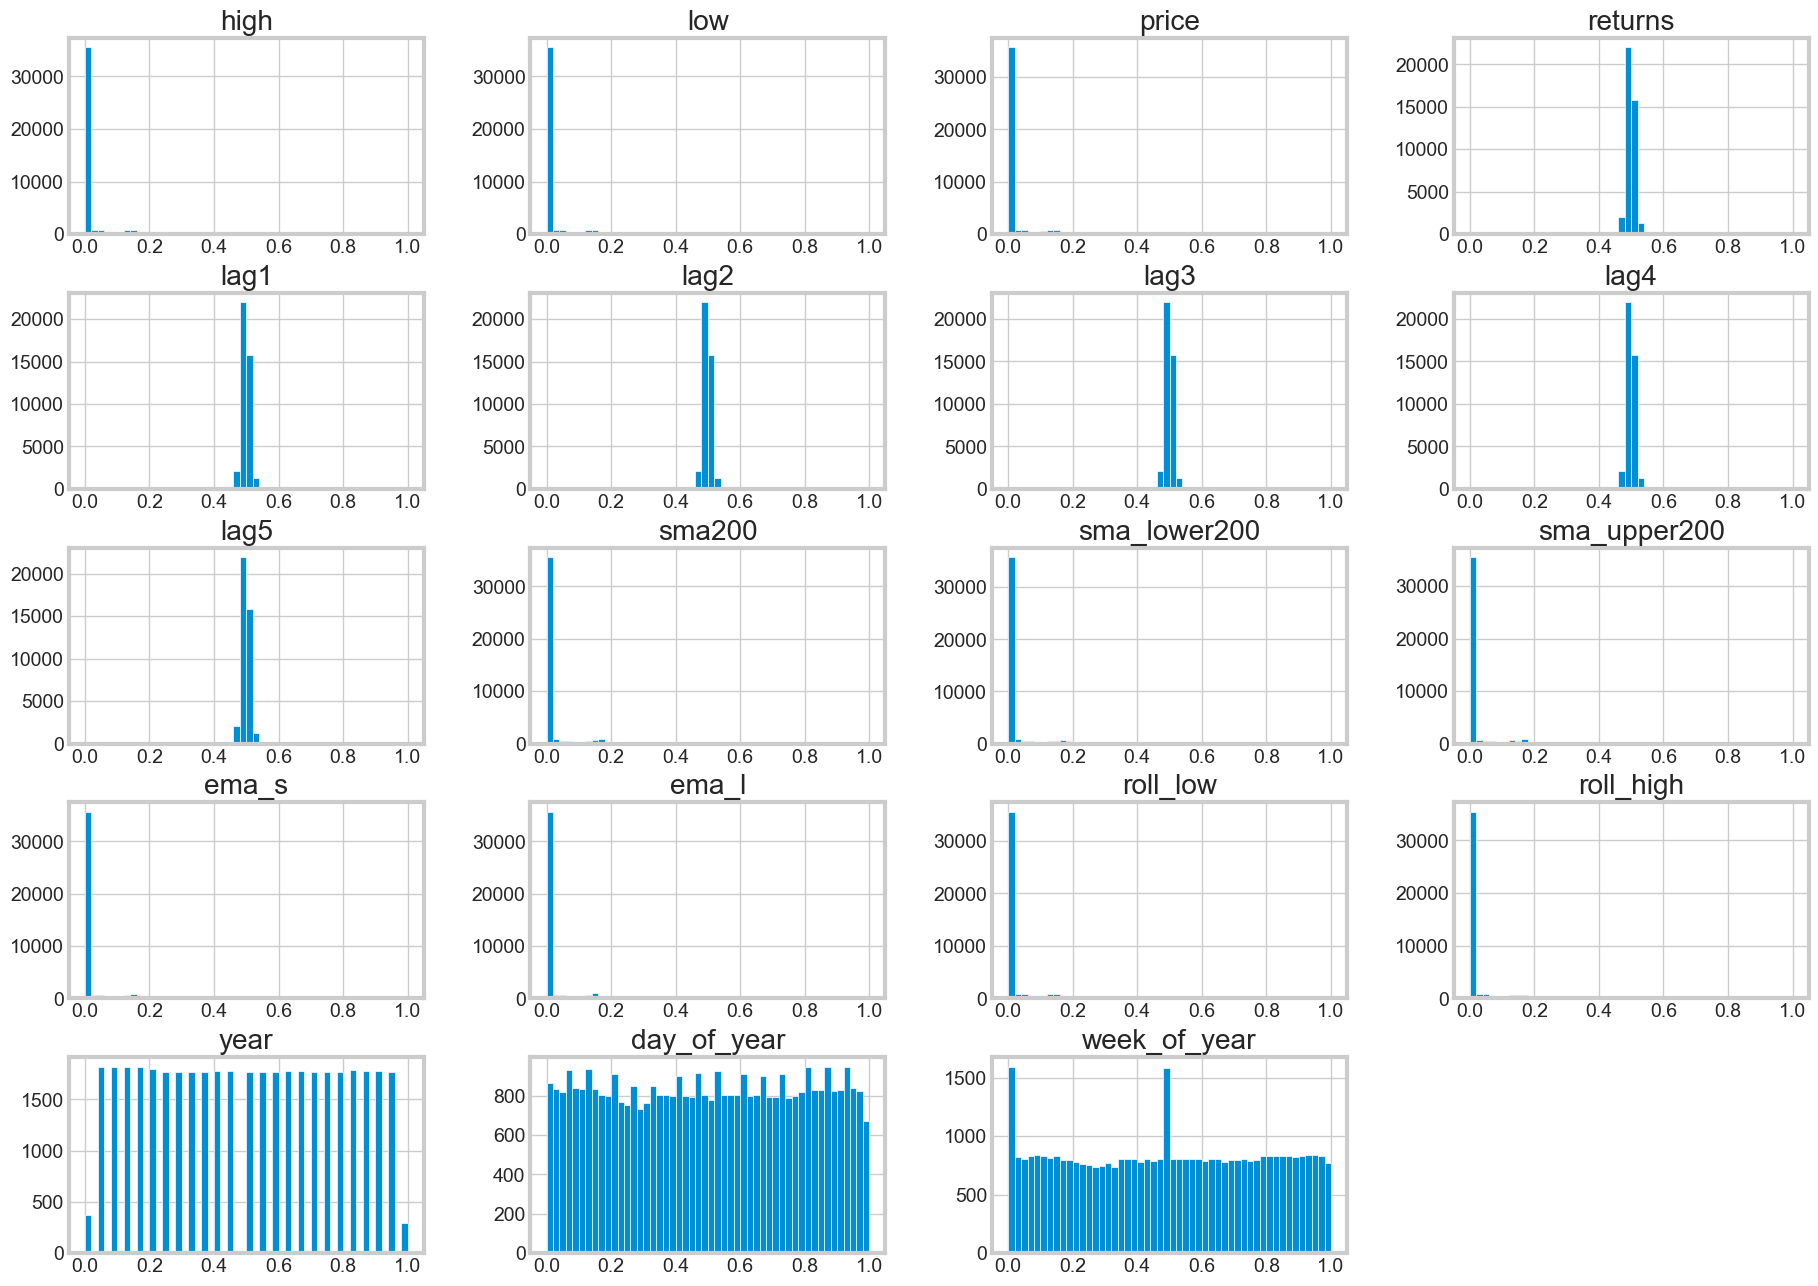

In [9]:
# Histogramas de todos los datos escalados
df_num.hist(figsize=(20, 15), bins=50, layout=(5, 4))
plt.show()
# Me parece rara la distribucion de price, low y high...

Ahora ya tengo el df de categóricas con onehotencoding y las numéricas con los datos escalados. Por tanto los quiero volver a unir y juntar también con las variables seno y cosenoidales. Y tener solo separada la variable objetivo

In [10]:
df_num.high.describe()

count    41657.000000
mean         0.037865
std          0.121607
min          0.000000
25%          0.002112
50%          0.004266
75%          0.009804
max          1.000000
Name: high, dtype: float64

In [11]:
df = pd.concat([df_cat, df_num, df_sincos], axis=1)
df

,accion_AAPL,accion_BHP.AX,accion_IBE.MC,accion_RELIANCE.NS,accion_REP.MC,accion_SAN.MC,accion_TEF.MC,high,low,price,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,1,0,0,0,0,0,0,0.000046,0.000037,0.000029,...,0.000060,0.0,0.813699,0.807692,-0.866025,0.5,-0.988468,0.151428,0.781831,0.623490
1,1,0,0,0,0,0,0,0.000036,0.000034,0.000027,...,0.000052,0.0,0.816438,0.807692,-0.866025,0.5,-0.937752,0.347305,0.974928,-0.222521
2,1,0,0,0,0,0,0,0.000034,0.000029,0.000027,...,0.000052,0.0,0.819178,0.807692,-0.866025,0.5,-0.848644,0.528964,0.433884,-0.900969
3,1,0,0,0,0,0,0,0.000036,0.000031,0.000028,...,0.000052,0.0,0.821918,0.807692,-0.866025,0.5,-0.724793,0.688967,-0.433884,-0.900969
4,1,0,0,0,0,0,0,0.000040,0.000036,0.000031,...,0.000052,0.0,0.830137,0.826923,-0.866025,0.5,-0.201299,0.979530,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41652,0,0,0,0,0,0,1,0.001180,0.001174,0.001198,...,0.001178,1.0,0.145205,0.134615,0.866025,0.5,-0.998717,-0.050649,-0.433884,-0.900969
41653,0,0,0,0,0,0,1,0.001186,0.001187,0.001198,...,0.001179,1.0,0.153425,0.153846,0.866025,0.5,-0.848644,0.528964,0.000000,1.000000
41654,0,0,0,0,0,0,1,0.001193,0.001188,0.001209,...,0.001186,1.0,0.156164,0.153846,0.866025,0.5,-0.724793,0.688967,0.781831,0.623490
41655,0,0,0,0,0,0,1,0.001213,0.001209,0.001215,...,0.001206,1.0,0.158904,0.153846,0.866025,0.5,-0.571268,0.820763,0.974928,-0.222521


In [12]:
# por otra parte me guardo la variable objetivo en este dataframe y veo que está balanceado pero que tiene algunos 0, 
# no se bien que hacer con ellos. Significa que la diferencia de precio de un día a otro ha sido 0
df_dir.direction.value_counts()

direction
 1.0    21028
-1.0    19772
 0.0      857
Name: count, dtype: int64

Ahora vamos a entrenar un modelo solo para ver que tal funciona, si me das el ok Alejandro intento meterle un bucle para que pruebe distintos modelos y distintos escaladores. De momento hago la prueba con logistic regression.

In [13]:
df

,accion_AAPL,accion_BHP.AX,accion_IBE.MC,accion_RELIANCE.NS,accion_REP.MC,accion_SAN.MC,accion_TEF.MC,high,low,price,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,1,0,0,0,0,0,0,0.000046,0.000037,0.000029,...,0.000060,0.0,0.813699,0.807692,-0.866025,0.5,-0.988468,0.151428,0.781831,0.623490
1,1,0,0,0,0,0,0,0.000036,0.000034,0.000027,...,0.000052,0.0,0.816438,0.807692,-0.866025,0.5,-0.937752,0.347305,0.974928,-0.222521
2,1,0,0,0,0,0,0,0.000034,0.000029,0.000027,...,0.000052,0.0,0.819178,0.807692,-0.866025,0.5,-0.848644,0.528964,0.433884,-0.900969
3,1,0,0,0,0,0,0,0.000036,0.000031,0.000028,...,0.000052,0.0,0.821918,0.807692,-0.866025,0.5,-0.724793,0.688967,-0.433884,-0.900969
4,1,0,0,0,0,0,0,0.000040,0.000036,0.000031,...,0.000052,0.0,0.830137,0.826923,-0.866025,0.5,-0.201299,0.979530,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41652,0,0,0,0,0,0,1,0.001180,0.001174,0.001198,...,0.001178,1.0,0.145205,0.134615,0.866025,0.5,-0.998717,-0.050649,-0.433884,-0.900969
41653,0,0,0,0,0,0,1,0.001186,0.001187,0.001198,...,0.001179,1.0,0.153425,0.153846,0.866025,0.5,-0.848644,0.528964,0.000000,1.000000
41654,0,0,0,0,0,0,1,0.001193,0.001188,0.001209,...,0.001186,1.0,0.156164,0.153846,0.866025,0.5,-0.724793,0.688967,0.781831,0.623490
41655,0,0,0,0,0,0,1,0.001213,0.001209,0.001215,...,0.001206,1.0,0.158904,0.153846,0.866025,0.5,-0.571268,0.820763,0.974928,-0.222521


In [19]:

# Inicializar el clasificador
clf =  RandomForestClassifier() #si pongo randoforest me sale demasiado bien las métricas

# Preparar el método de validación cruzada estratificada
cv = StratifiedKFold(n_splits=5)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'), 
    'recall': make_scorer(recall_score, average='weighted'),     
    'f1': make_scorer(f1_score, average='weighted')                 
}
# Realizamos la validación cruzada y solicitamos las métricas de evaluación.
# Establecemos return_estimator=True si deseas investigar los modelos individuales más tarde.
scores = cross_validate(clf, df, df_dir, cv=cv, scoring=scoring, 
                        return_train_score=False)

# Convertimos los puntajes en un DataFrame de pandas para mejor visualización.
df_scores = pd.DataFrame(scores)

# Calculamos la media de las métricas de evaluación.
mean_scores = {metric: np.mean(values) for metric, values in scores.items()}
df_mean_scores = pd.DataFrame([mean_scores], index=['mean'])

# Concatenamos los resultados individuales y la media en una sola tabla.
df_final_scores = pd.concat([df_scores, df_mean_scores])

# Solo seleccionamos las columnas de interés, es decir, las métricas de evaluación.
df_metrics = df_final_scores.filter(like='test_').rename(columns=lambda name: name.replace('test_', ''))

# Mostrar la tabla final con las métricas.
print(df_metrics)

      accuracy  precision    recall        f1
0     0.999160   0.999157  0.999160  0.999154
1     0.835094   0.981554  0.835094  0.883875
2     0.653463   0.978001  0.653463  0.715247
3     0.930981   0.984108  0.930981  0.950231
4     0.999760   0.999763  0.999760  0.999761
mean  0.883691   0.988517  0.883691  0.909654
{'fit_time': array([15.46080899, 15.18448925, 13.75017095, 15.02859926, 16.47527766]), 'score_time': array([0.09999013, 0.07299829, 0.06899571, 0.08300209, 0.07900167]), 'test_accuracy': array([0.99915987, 0.83509361, 0.65346297, 0.93098067, 0.99975993]), 'test_precision': array([0.99915734, 0.98155431, 0.9780006 , 0.984108  , 0.99976271]), 'test_recall': array([0.99915987, 0.83509361, 0.65346297, 0.93098067, 0.99975993]), 'test_f1': array([0.9991539 , 0.88387521, 0.71524743, 0.95023132, 0.9997606 ])}


Las métricas que no son accuracy solo me funcionan si elimino los 0 de la variable objetivo, según he leido por desbalanceo de cargas... no estoy seguro

Ahora entreno el modelo con todo el conjunto solo para ver la importancia de cada variable

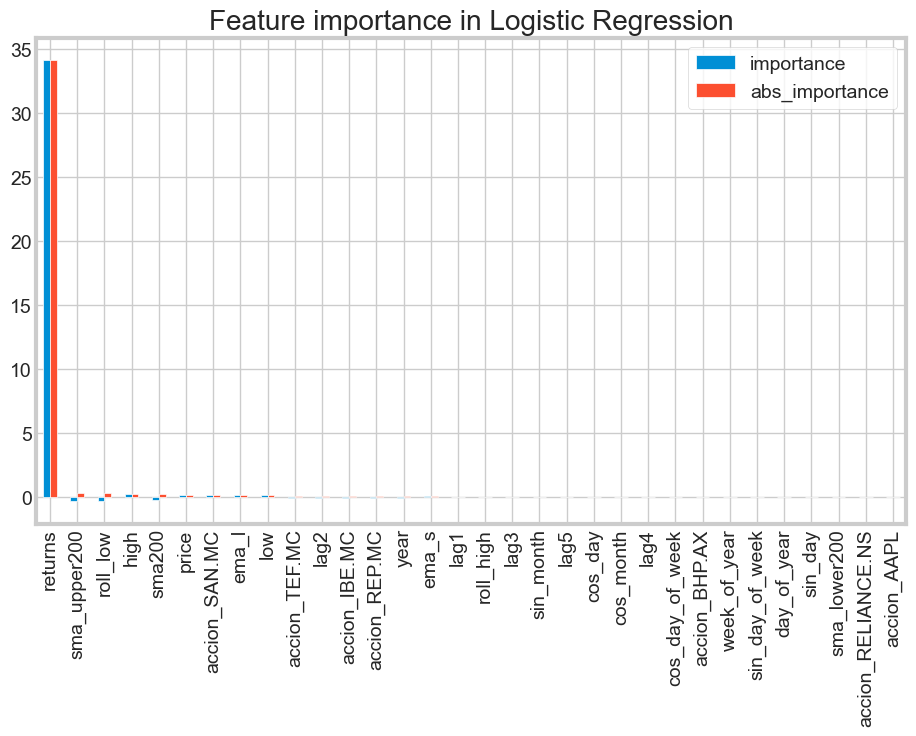

In [24]:
#

# Entrenar el modelo con todo el conjunto de datos
clf = LogisticRegression(max_iter=1000)
clf.fit(df, df_dir)

# Obtener los coeficientes
feature_importance = pd.DataFrame(clf.coef_[0], index=df.columns, columns=["importance"])

# Calcular la importancia absoluta
feature_importance['abs_importance'] = feature_importance['importance'].abs()

# Ordenar las características por importancia absoluta
feature_importance = feature_importance.sort_values("abs_importance", ascending=False)

# Visualizar la importancia de las características
feature_importance.plot(kind='bar', figsize=(10, 6))
plt.title('Feature importance in Logistic Regression')
plt.show()
